In [1]:
# Assign input x and observed output b
import numpy as np
import matplotlib.pyplot as plt
import math
data=np.arange(0,1.01,.01)
pii=math.pi
f_x=np.sin(2*pii*data)
data
x0=np.ones(len(data))
A1=np.asarray([x0,data])

In [2]:
#dataset take 2 random numbers
import random
x1 = random.random()
x2 = random.random()
x=np.array([x1,x2])
print(x)

[0.34966975 0.91223734]


In [3]:
#calculate b for the data
b=np.sin(2*pii*x)
f1=np.average(b)
f1

0.14316494411591246

In [4]:
#calculate f_hat
def calcF2(x,y):
    x1=x[0]
    x2=x[1]
    y1=y[0]
    y2=y[1]
    m = (y2-y1)/(x2-x1)
    c=y1-m*x1
    f2=m*x+c
    f_bar=np.mean(f2)
    return f2

In [5]:
f2=calcF2(x,b)


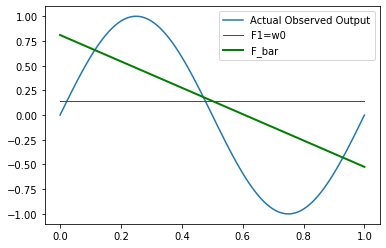

In [6]:
#plot the data
plt.plot(data,f_x,label='Actual Observed Output')
plt.plot(np.asarray([0,1]),np.asarray([f1,f1]),'red',linewidth=1,label='F1=w0')
plt.plot(np.asarray([0,1]),f2,'green',linewidth=2,label='F_bar')
plt.legend()

In [7]:
#calculate f_hat for different samples
def gen_f2(T):
  x=np.zeros((T,2))
  b_data=np.zeros((T,2))
  f2_avg=np.zeros((T,2))
  #f_bar=np.zeros((T))
  for i in range(T):
    x1 = random.uniform(0,.75)      #generate random input data #biased the points little bit to ensure to get all type of observation, also
    x2 = random.uniform(.25,1)      #make sure that the data contain some correct observation
    x[i,:]=np.array([x1,x2])
    #print(x[i,:])
    b_data[i,:]=np.sin(2*pii*x[i,:])
    #f1_avg[i]=np.average(b_data[i,:])
    f2_avg[i,:]=calcF2(x[i,:],b_data[i,:])    #f_avg for every sample
    plt.plot(np.asarray([0,1]),f2_avg[i,:],'black',linewidth=.5)
  f2_bar_avg=(np.mean(f2_avg[:,0])+np.mean(f2_avg[:,1]))/2
  f2_bar=np.asanyarray([np.mean(f2_avg[:,0]),np.mean(f2_avg[:,1])])  #f_hat for all samples
  #f2_bar=np.mean(f_bar)
  
  return b_data,f2_avg,f2_bar_avg,x,f2_bar



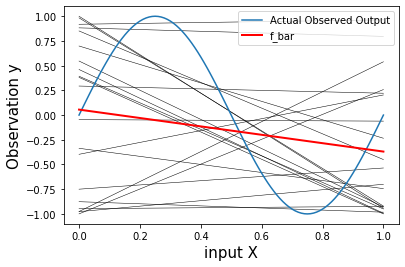

In [8]:
#calculate prediction, average f2 value, f2_bar and f2_hat for 20 samples
b20,f2_20,f2_baravg_20,X20,f2_bar_20=gen_f2(20)     #X20=take the 20 random x to use it later
plt.plot(data,f_x,label='Actual Observed Output')
plt.plot(np.asarray([0,1]),f2_bar_20,'red',linewidth=2,label='f_bar')
plt.xlabel('input X',fontsize='15')
plt.ylabel('Observation y',fontsize='15')
plt.legend(loc=1)
#plt.plot(np.asarray([0,1]),np.asarray([f1_rms_bias_20,f1_rms_bias_20]),'green',linewidth=2)

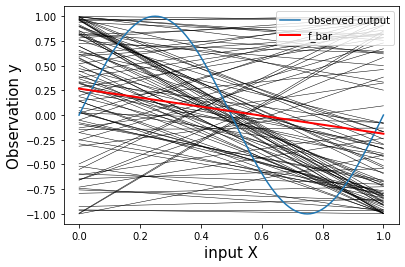

In [9]:
#generate 100 random numbers
b100,f2_100,f2_baravg_100,X100,f2_bar_100=gen_f2(100)
plt.plot(data,f_x,label='observed output')
plt.plot(np.asarray([0,1]),f2_bar_100,'red',linewidth=2,label='f_bar')
plt.xlabel('input X',fontsize='15')
plt.ylabel('Observation y',fontsize='15')
plt.legend(loc=1)

In [10]:
#calculate the bias
#as far as formulas from lectures 
f2_bias_20=(f_x-f2_baravg_20)
f2_rms_bias_20=np.sqrt(np.mean(f2_bias_20**2))
print("the bias for 20 data",f2_rms_bias_20)
#calculate the mean and variance
#f2bar1=np.mean(f2_bar_100)
f2_bias_100=(f_x-f2_baravg_100)
f2_rms_bias_100=np.sqrt(np.mean(f2_bias_100**2))
print("the bias for 100 data",f2_rms_bias_100)



the bias for 20 data 0.7208922948784194
the bias for 100 data 0.7047109818850708


In [12]:
#calculate the bias when we assume the observation is b1,b2
#as far as formulas from lectures 
#f2_bias_20=(b20-f2_bar_20)
#f2_rms_bias_20=np.sqrt(np.mean(f2_bias_20**2))
#print("the bias for 20 data",f2_rms_bias_20)
#calculate the mean and variance
#f2bar1=np.mean(f2_bar_100)
#f2_bias_100=(b100-f2_bar_100)
#f2_rms_bias_100=np.sqrt(np.mean(f2_bias_100**2))
#print("the bias for 100 data",f2_rms_bias_100)

In [11]:
#calculate the variance
f2_var_20=np.mean((f2_20-f2_bar_20)**2)
print("variance of 20 data",f2_var_20)
#calculate the variance
f2_var_100=np.mean((f2_100-f2_bar_100)**2)
print("variance of 100 data",f2_var_100)

variance of 20 data 0.4806755604008033
variance of 100 data 0.4424527555655983


In [12]:
def calc_y(X,l,b,n):
  A=np.hstack((np.ones((n,1)),X))
  a1=np.dot(np.transpose(A),A)
  I=np.identity(len(a1))
  I_l=np.multiply(I,l)
  a2=a1+I_l
  a2_inv=np.linalg.inv(a2)
  a3=np.dot(a2_inv,np.transpose(A))
  wreg=np.dot(a3,b)
  y=np.dot(A,wreg)
  return y


In [13]:
#calculate f_bar, f_hat using regularization
def Reg_f2(T,b_data,x):
  f2_avg=np.zeros((T,2))
  for i in range(T):
    #f1_avg[i]=np.average(b_data[i,:])
    f2_avg[i,:]=calcF2(x[i,:],b_data[i,:])
    #plt.plot(np.asarray([0,1]),f2_avg[i,:],'black',linewidth=1)
  f21_bar=np.mean(f2_avg[:,0])
  f22_bar=np.mean(f2_avg[:,1])
  f2_bar_avg=(np.mean(f2_avg[:,0])+np.mean(f2_avg[:,1]))/2
  f2_bar=np.asanyarray([np.mean(f2_avg[:,0]),np.mean(f2_avg[:,1])])
  return f2_avg,f2_bar_avg,f2_bar

In [14]:
#generate 20 random numbers
#calculate y20
def calc_bias(l,X,b,T):
  yy=calc_y(X,l,b,T)
  f_hat,f_bar_avg,f_bar=Reg_f2(T,yy,X)
  f2r_bias=(f_x-f_bar_avg)
  f2rms=np.sqrt(np.mean(f2r_bias**2))
  return f2rms


In [15]:
#generate 20 random numbers
#calculate y20
def calc_var(l,X,b,T):
  yy=calc_y(X,l,b,T)
  f_hat,f_bar_avg,f_bar=Reg_f2(T,yy,X)
  f2reg_var=np.mean((f_hat-f_bar)**2)
  return f2reg_var

In [16]:
l=[.1,.3,.5,.8,1,2,3]   #lambda
n=len(l)
bias20=np.zeros(len(l))
bias100=np.zeros(len(l))
for i in range(n):
  bias20[i]=calc_bias(l[i],X20,b20,20)
  bias100[i]=calc_bias(l[i],X100,b100,100)
 

In [19]:
l=[.01,.05,.1,.3,.5,1,2]
n=len(l)
var20=np.zeros(len(l))
var100=np.zeros(len(l))
for i in range(n):
  var20[i]=calc_var(l[i],X20,b20,20)
  var100[i]=calc_var(l[i],X100,b100,100)

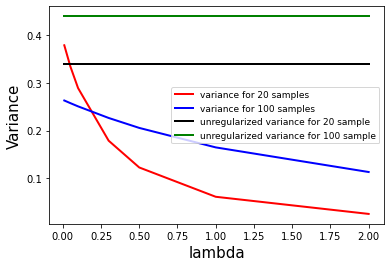

In [20]:
#plot variance
plt.plot(l,var20,'red',linewidth=2,label='variance for 20 samples')
plt.plot(l,var100,'blue',linewidth=2,label='variance for 100 samples')
#this is the variance value of my calculation, it may vary depend on x random values, so will be different for different runtime
plt.plot(l,np.asarray([.34,.34,.34,.34,.34,.34,.34]),'black',linewidth=2,label='unregularized variance for 20 sample')
plt.plot(l,np.asarray([.44,.44,.44,.44,.44,.44,.44]),'green',linewidth=2,label='unregularized variance for 100 sample')
plt.xlabel('lambda',fontsize='15')
plt.ylabel('Variance',fontsize='15')
plt.legend(fontsize=9)

In [ ]:
#bias plot
plt.plot(l,bias20,'red',linewidth=2,label='bias for 20 samples')
plt.plot(l,bias100,'blue',linewidth=2,label='bias for 100 samples')
#this is the bias value of my calculation, it may vary depend on x random values, so will be different for different runtime
plt.plot(l,np.asarray([.7057,.7057,.7057,.7057,.7057,.7057,.7057]),'black',linewidth=2,label='unregularized bias for 20 sample')
plt.plot(l,np.asarray([.706,.706,.706,.706,.706,.706,.706]),'green',linewidth=2,label='unregularized bias for 100 sample')
plt.xlabel('lambda',fontsize='15')
plt.ylabel('Bias',fontsize='15')
plt.legend(fontsize=8)

In [ ]:
#.............................................Rough Code
#calculate the bias 
f2r_bias_20=(y20-f_bar20)
f2reg_rms_bias_20=np.sqrt(np.mean(f2r_bias_20**2))
print("the bias for 20 data",f2reg_rms_bias_20)

#calculate the variance
f2reg_var_20=np.mean((f_hat20-f_bar20)**2)
print("variance of 20 data",f2reg_var_20)

the bias for 20 data 0.2326079559168401
variance of 20 data 0.05410646115581066


In [ ]:
#calculate y100
y100=calc_y(X100,1,b100,100)
f_hat100,f_bar100=Reg_f2(100,y100,X100)

In [ ]:
#calculate the bias 
f2r_bias_100=(y100-f_bar100)
f2reg_rms_bias_100=np.sqrt(np.mean(f2r_bias_100**2))
print("the bias for 20 data",f2reg_rms_bias_100)

#calculate the variance
f2reg_var_100=np.mean((f_hat100-f_bar100)**2)
print("variance of 100 data",f2reg_var_100)

the bias for 20 data 0.38340891633473784
variance of 100 data 0.147002397124978


In [ ]:
#bias and variance for different l
#manually collect them using different lembda

var20=[.27,.243,.21,.139,.10,.05]
bias20=[.524,.49,.46,.37,.31,.23]
var20=[.27,.243,.21,.139,.10,.05]
bias20=[.524,.49,.46,.37,.31,.23]
var100=[.232,.230,.224,.202,.184,.147]
bias100=[.483,.48,.474,.449,.428,.383]
